In [147]:
import glob
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# metrics_to_use = ["accuracy", "relative_accuracy", "inference_time", "memory_use_GB", "disk_use_GB"]
metrics_to_use = ["student_model_name", "inference_speed", "student_memory", "student_num_params", "train_loss", "val_loss", "train_acc", "val_acc"]

In [25]:
json_files = glob.glob('./results/*.json')
json_file_names = [os.path.basename(file) for file in json_files]

print(json_file_names)

['mobilenet-V3-large_best-0.9757621932029724_lr-0.001_bs-256_weight_decay-0_T-2_loss_ratio-0.5.json', 'mobilenet-V3-large_best-0.9829496932029724_lr-0.001_bs-256_weight_decay-0_T-4_loss_ratio-0.5.json', 'mobilenet-V3-large_best-0.9829687476158142_lr-0.001_bs-256_weight_decay-0_T-6_loss_ratio-0.5.json', 'mobilenet-V3-small_best-0.9733993887901307_lr-0.001_bs-256_weight_decay-0_T-2_loss_ratio-0.5.json', 'mobilenet-V3-small_best-0.9762499976158142_lr-0.001_bs-256_weight_decay-0_T-4_loss_ratio-0.5.json', 'mobilenet-V3-small_best-0.9771108128586594_lr-0.001_bs-128_weight_decay-0_T-1_loss_ratio-0.json', 'mobilenet-V3-small_best-0.9771684432029724_lr-0.001_bs-256_weight_decay-0_T-6_loss_ratio-0.5.json', 'teacher_model_num_epochs-2_lr-0.001_bs-64_weight_decay-0.0001_data_dir-real_data_n_classes-4_T-0.8_loss_ratio-0.5_greyscale-False_pretrained-False.json']


In [129]:
json_data = []

for file in json_files:
    with open(file, 'r') as json_file:
        if "teacher" not in file:
            data = json.load(json_file)
            json_data.append(data)
        else:
            teacher_data = json.load(json_file)


In [130]:
# teacher_data

{'num_epochs': 2,
 'lr': 0.001,
 'bs': 64,
 'weight_decay': 0.0001,
 'student_model_name': 'mobilenet-V3',
 'data_dir': 'real_data',
 'n_classes': 4,
 'T': 0.8,
 'loss_ratio': 0.5,
 'greyscale': False,
 'pretrained': False,
 'filename': 'teacher_model_num_epochs-2_lr-0.001_bs-64_weight_decay-0.0001_data_dir-real_data_n_classes-4_T-0.8_loss_ratio-0.5_greyscale-False_pretrained-False',
 'train_speed': 5,
 'inference_speed': [8.445559740066528],
 'student_memory': 512.2214508056641,
 'student_num_params': 134275780,
 'train_loss': 5,
 'val_loss': [1.327368676662445],
 'train_acc': 5,
 'val_acc': [0.8723958432674408],
 'F1_score': []}

In [131]:
teacher_data["student_model_name"] = "teacher model"
teacher_data["train_loss"] = None
teacher_data["train_acc"] = None
teacher_data["inference_speed"] = teacher_data["inference_speed"][0]
teacher_data["val_loss"] = teacher_data["val_loss"][0]
teacher_data["val_acc"] = teacher_data["val_acc"][0]
teacher_data = [{key: teacher_data[key] for key in metrics_to_use}]
teacher_data

[{'student_model_name': 'teacher model',
  'inference_speed': 8.445559740066528,
  'student_memory': 512.2214508056641,
  'student_num_params': 134275780,
  'train_loss': None,
  'val_loss': 1.327368676662445,
  'train_acc': None,
  'val_acc': 0.8723958432674408}]

In [132]:
# json_data

[{'num_epochs': 20,
  'lr': 0.001,
  'bs': 256,
  'weight_decay': 0,
  'student_model_name': 'mobilenet-V3-large',
  'data_dir': 'real_data',
  'n_classes': 4,
  'T': 2,
  'loss_ratio': 0.5,
  'greyscale': False,
  'pretrained': False,
  'train_split': 0.8,
  'filename': 'mobilenet-V3-large_best-0.9757621932029724_num_epochs-20_lr-0.001_bs-256_weight_decay-0_data_dir-real_data_n_classes-4_T-2_loss_ratio-0.5_greyscale-False_pretrained-False_train_split-0.8',
  'train_speed': [184.0218300819397,
   141.63831043243408,
   113.49808287620544,
   59.247318267822266,
   59.31379556655884,
   455.672976732254,
   98.60409283638,
   25.455638885498047,
   25.494115114212036,
   25.47267174720764,
   25.464202165603638,
   25.49464201927185,
   25.493333101272583,
   25.501014232635498,
   669.7361698150635,
   431.82127833366394],
  'inference_speed': [123.62584161758423,
   123.7451388835907,
   74.39270973205566,
   112.46351790428162,
   80.77999997138977,
   229.61643362045288,
   5.606075

In [133]:
json_data = [{key: report[key] for key in metrics_to_use} for report in json_data]
# json_data

[{'student_model_name': 'mobilenet-V3-large',
  'inference_speed': [123.62584161758423,
   123.7451388835907,
   74.39270973205566,
   112.46351790428162,
   80.77999997138977,
   229.61643362045288,
   5.606075763702393,
   5.012688636779785,
   5.0090649127960205,
   5.014962196350098,
   5.013627767562866,
   5.017510652542114,
   5.010210037231445,
   5.011831521987915,
   14.417778015136719,
   127.45600366592407],
  'student_memory': 16.1424560546875,
  'student_num_params': 4207156,
  'train_loss': [0.8291053823670562,
   0.22949213443361982,
   0.1118223823378889,
   0.06468779643123247,
   0.04943413625718379,
   0.03872879383591365,
   0.03222510136891993,
   0.029208817519247532,
   0.027328016711589024,
   0.028510349260985245,
   0.0284695363299427,
   0.02931453684839059,
   0.03226028072970862,
   0.04027598194435847,
   0.05599481812013047,
   0.04998175936694048],
  'val_loss': [3.0397050285339358,
   2.9049794769287107,
   3.160389127731323,
   3.6400897121429443,
   

In [134]:
# Calculate averages
for report in json_data:
    for key, value in report.items():
        if isinstance(value, list):
            # If the value is a list, calculate the average
            avg = sum(value) / len(value)
            report[key] = avg

json_data

[{'student_model_name': 'mobilenet-V3-large',
  'inference_speed': 57.94958718121052,
  'student_memory': 16.1424560546875,
  'student_num_params': 4207156,
  'train_loss': 0.10480248899144425,
  'val_loss': 1.4660763854673133,
  'train_acc': 0.9817506266491753,
  'val_acc': 0.7724404522776604},
 {'student_model_name': 'mobilenet-V3-large',
  'inference_speed': 16.745843636989594,
  'student_memory': 16.1424560546875,
  'student_num_params': 4207156,
  'train_loss': 0.20647401861200226,
  'val_loss': 2.795055589005351,
  'train_acc': 0.9855721194829259,
  'val_acc': 0.8241415761709213},
 {'student_model_name': 'mobilenet-V3-large',
  'inference_speed': 5.002408504486084,
  'student_memory': 16.1424560546875,
  'student_num_params': 4207156,
  'train_loss': 0.3449659603533848,
  'val_loss': 5.123501697272062,
  'train_acc': 0.9849945967902943,
  'val_acc': 0.8185272467136382},
 {'student_model_name': 'mobilenet-V3-small',
  'inference_speed': 51.69056544303894,
  'student_memory': 5.852

In [135]:
full_json = (teacher_data + json_data)

In [141]:
df = pd.DataFrame(full_json)
df["student_model_name"] = df["student_model_name"] + df.index.astype(str)
df['student_num_params'] = df['student_num_params'] / 1e6
df["relative_val_loss"] = df["val_loss"] / teacher_data[0]["val_loss"]
df["relative_val_acc"] = df["val_acc"] / teacher_data[0]["val_acc"]

print(df)

df_melted_model = pd.melt(df, id_vars=["student_model_name"], var_name="metric", value_name="value")

    student_model_name  inference_speed  student_memory  student_num_params  \
0       teacher model0         8.445560      512.221451          134.275780   
1  mobilenet-V3-large1        57.949587       16.142456            4.207156   
2  mobilenet-V3-large2        16.745844       16.142456            4.207156   
3  mobilenet-V3-large3         5.002409       16.142456            4.207156   
4  mobilenet-V3-small4        51.690565        5.852264            1.521956   
5  mobilenet-V3-small5        72.403278        5.852264            1.521956   
6  mobilenet-V3-small6        19.277613        5.852264            1.521956   
7  mobilenet-V3-small7        62.637822        5.852264            1.521956   

   train_loss  val_loss  train_acc   val_acc  relative_val_loss  \
0         NaN  1.327369        NaN  0.872396           1.000000   
1    0.104802  1.466076   0.981751  0.772440           1.104498   
2    0.206474  2.795056   0.985572  0.824142           2.105712   
3    0.344966  5.123

In [150]:
# # Create a bar plot for student_num_params
# plt.barh(df['student_model_name'], df['student_num_params'], color='b', alpha=0.5)
# plt.xlabel('student_num_params (in millions)')
# plt.ylabel('student_model_name')
# plt.show()

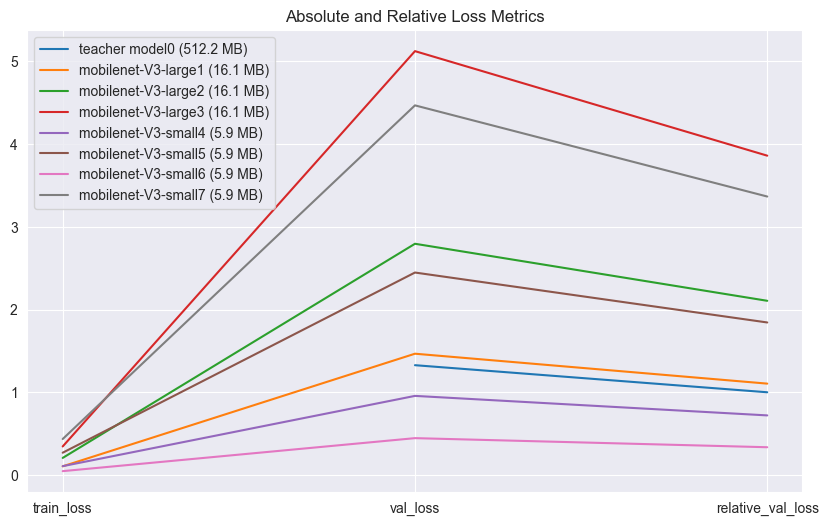

In [175]:
# Define the metrics and model names
metrics = ['train_loss', 'val_loss', 'relative_val_loss']
model_names = df['student_model_name'].unique()

# Create a new figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the absolute loss metrics
for model in model_names:
    values = df[df['student_model_name'] == model][['train_loss', 'val_loss', 'relative_val_loss']].values.flatten()
    ax1.plot(metrics, values, label=f"{model} ({df[df['student_model_name'] == model]['student_memory'].values[0]:.1f} MB)")

# Add a legend and a title
ax1.legend(loc='upper left')
plt.title('Absolute and Relative Loss Metrics')

plt.savefig('images/losses.png')
plt.show()


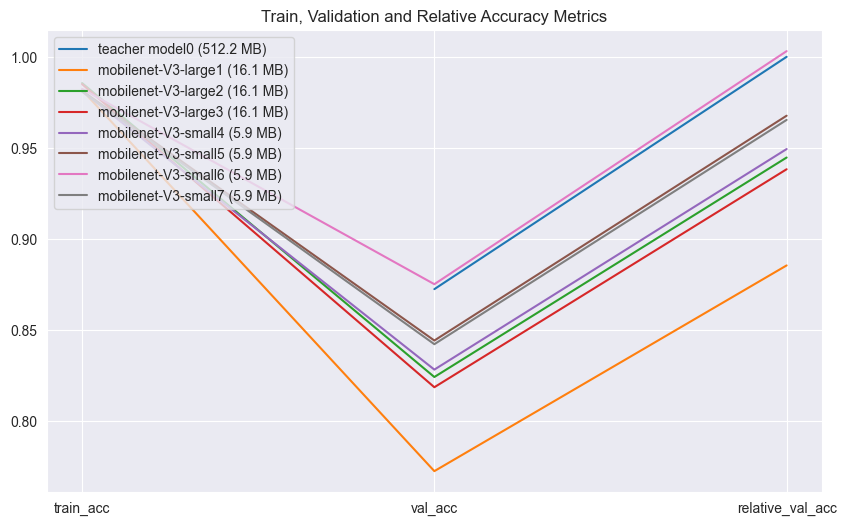

In [176]:
# Define the metrics and model names
metrics = ['train_acc', 'val_acc', 'relative_val_acc']
model_names = df['student_model_name'].unique()

# Create a new figure
fig, ax1 = plt.subplots(figsize=(10, 6))
# sns.set_style("darkgrid")

# Plot the accuracy metrics
for model in model_names:
    values = df[df['student_model_name'] == model][metrics].values.flatten()
    ax1.plot(metrics, values, label=f"{model} ({df[df['student_model_name'] == model]['student_memory'].values[0]:.1f} MB)")

# Add a legend and a title
ax1.legend(loc='upper left')
plt.title('Train, Validation and Relative Accuracy Metrics')

plt.savefig('images/accs.png')
plt.show()


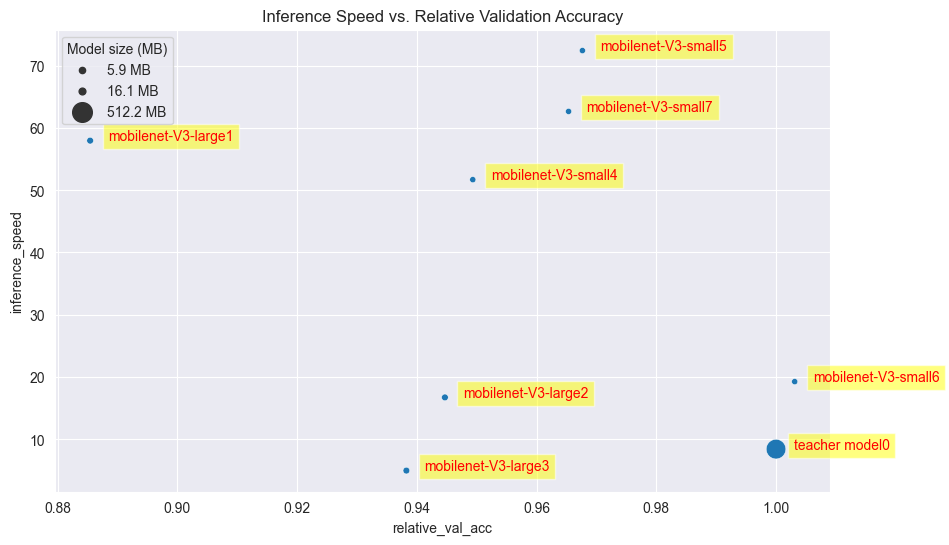

In [177]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='relative_val_acc', y='inference_speed', size='student_memory', sizes=(20, 200))

# Add model names as text annotations
for i in range(df.shape[0]):
    plt.text(x=df['relative_val_acc'].iloc[i]+0.003, 
             y=df['inference_speed'].iloc[i], 
             s=df['student_model_name'].iloc[i], 
             fontdict=dict(color='red',size=10),
             bbox=dict(facecolor='yellow',alpha=0.5))

# Modify the legend to round sizes and add a title
handles, labels = scatter.get_legend_handles_labels()
labels = [f'{round(float(label), 1)} MB' for label in labels]
plt.legend(handles, labels, title='Model size (MB)', loc=2)

plt.title('Inference Speed vs. Relative Validation Accuracy')
plt.savefig('images/fat_plot.png')
plt.show()
